In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("../Resources/singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


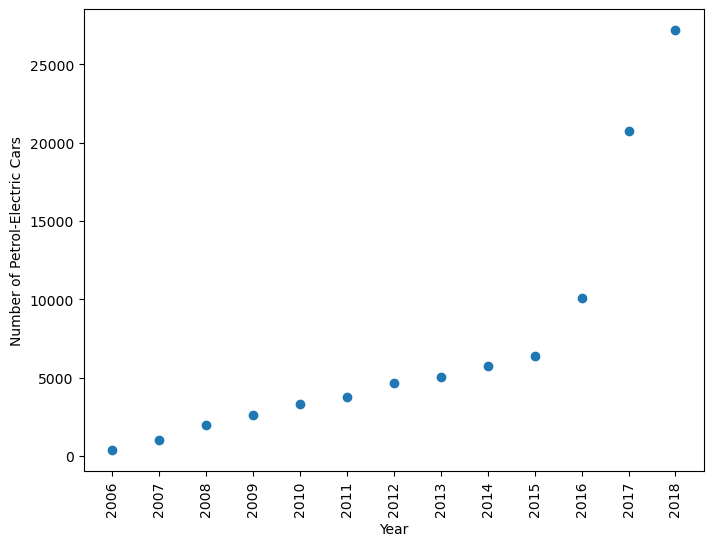

In [51]:
# Generate a scatter plot of year versus number of petrol-electric cars
# Get data
car_vehicle_data = vehicle_data[(vehicle_data['type'] == 'Cars')]
x = car_vehicle_data['year'].unique()
pe_y = car_vehicle_data[(car_vehicle_data['engine'] == 'Petrol-Electric')]['number']
# Plot
plt.scatter(x, pe_y)
plt.xlabel('Year')
plt.ylabel('Number of Petrol-Electric Cars')
plt.xticks(x, rotation=90)
plt.show()

In [52]:
# Perform a linear regression on year versus petrol-electric cars
(pe_slope, pe_intercept, pe_rvalue, pe_pvalue, pe_stderror) = stats.linregress(x, pe_y)

In [59]:
# Create equation of line to calculate predicted number of petrol-electric cars
pe_equation = f'y = {round(pe_slope,2)}x + {round(pe_intercept,2)}'
print(pe_equation)
pe_reg_values = pe_slope * x + pe_intercept

y = 1697.0x + -3407212.46


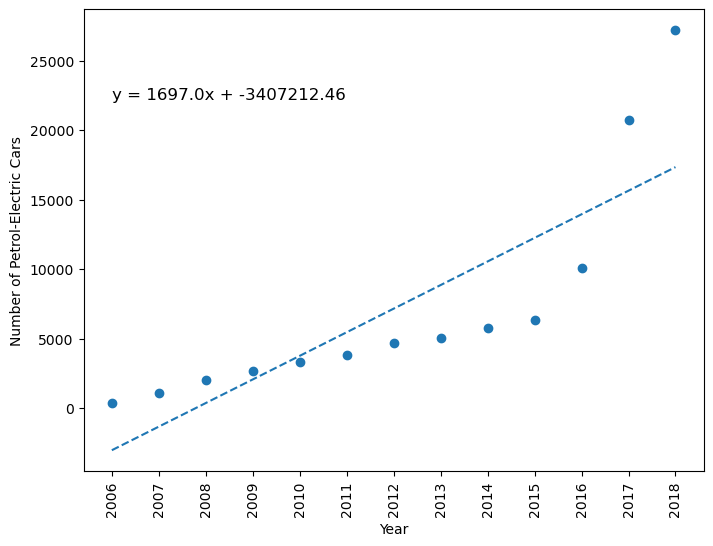

In [60]:
# Plot the linear model on top of scatter plot 
plt.scatter(x, pe_y)
plt.xlabel('Year')
plt.ylabel('Number of Petrol-Electric Cars')
plt.xticks(x, rotation=90)
plt.plot(x, pe_reg_values, ls = '--')
plt.annotate(pe_equation, (2006, 22250), fontsize=12)
plt.show()

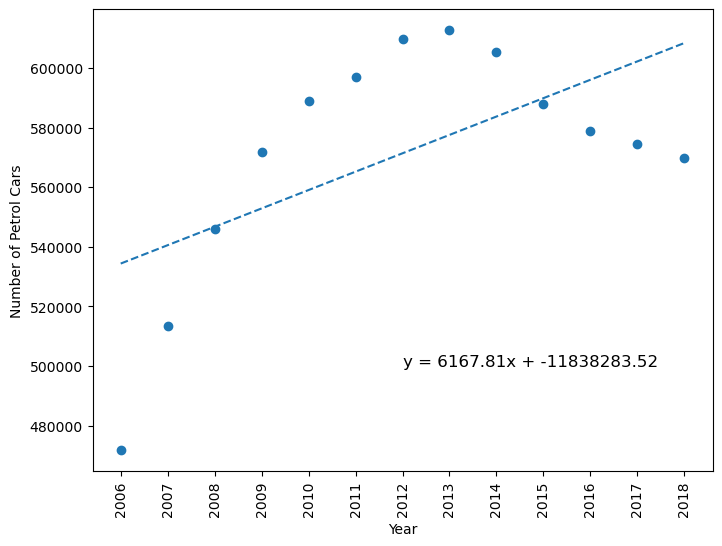

In [61]:
# Repeat plotting scatter and linear model for year versus petrol cars
# get values
p_y = car_vehicle_data[(car_vehicle_data['engine'] == 'Petrol')]['number']
# linear reg
(p_slope, p_intercept, p_rvalue, p_pvalue, p_stderror) = stats.linregress(x, p_y)
p_equation = f'y = {round(p_slope,2)}x + {round(p_intercept,2)}'
p_reg_values = p_slope * x + p_intercept
# plot
plt.scatter(x, p_y)
plt.xlabel('Year')
plt.ylabel('Number of Petrol Cars')
plt.xticks(x, rotation=90)
plt.plot(x, p_reg_values, ls = '--')
plt.annotate(p_equation, (2012, 500000), fontsize=12)
plt.show()

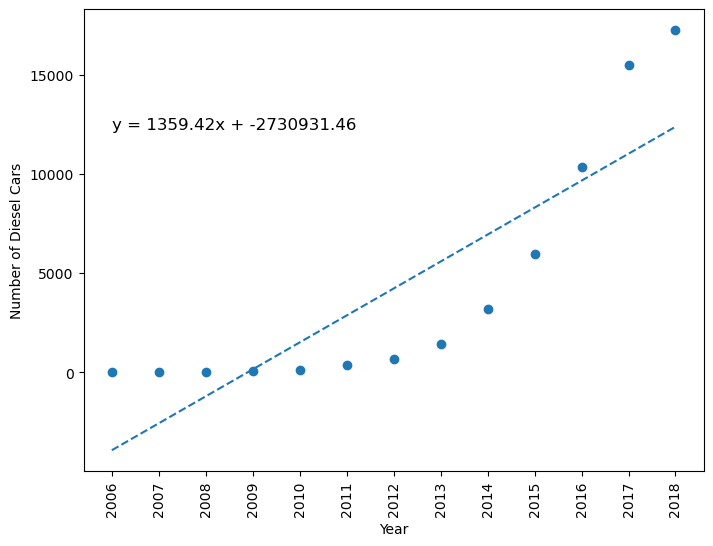

In [65]:
# Repeat plotting scatter and linear model for year versus diesel cars
# get values
d_y = car_vehicle_data[(car_vehicle_data['engine'] == 'Diesel')]['number']
# linear reg
(d_slope, d_intercept, d_rvalue, d_pvalue, d_stderror) = stats.linregress(x, d_y)
d_equation = f'y = {round(d_slope,2)}x + {round(d_intercept,2)}'
d_reg_values = d_slope * x + d_intercept
# plot
plt.scatter(x, d_y)
plt.xlabel('Year')
plt.ylabel('Number of Diesel Cars')
plt.xticks(x, rotation=90)
plt.plot(x, d_reg_values, ls = '--')
plt.annotate(d_equation, (2006, 12250), fontsize=12)
plt.show()

Text(0.5, 0, 'Year')

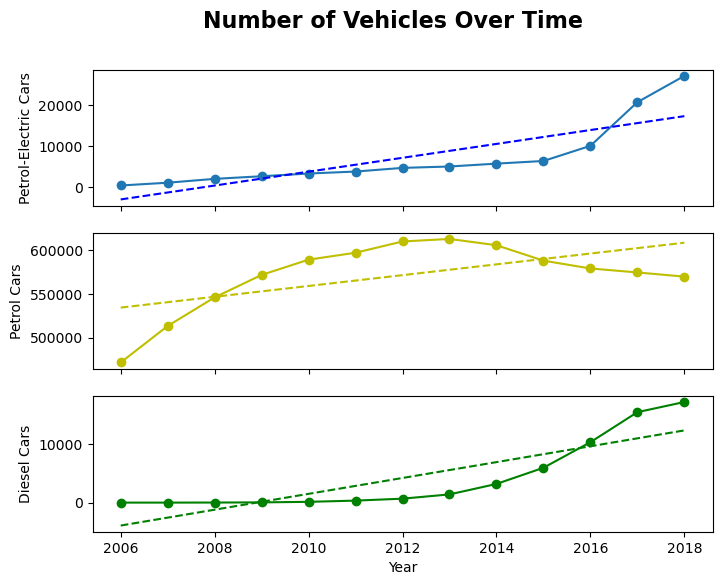

In [73]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex = True)
fig.suptitle("Number of Vehicles Over Time", fontsize=16, fontweight="bold")
# Petrol-Electric
ax1.plot(x, pe_y, marker='o')
ax1.plot(x, pe_reg_values, 'b--')
ax1.set_ylabel('Petrol-Electric Cars')
# Petrol
ax2.plot(x, p_y, marker='o', c='y')
ax2.plot(x, p_reg_values, 'y--')
ax2.set_ylabel('Petrol Cars')
# Diesel
ax3.plot(x, d_y, marker='o', c='g')
ax3.plot(x, d_reg_values, 'g--')
ax3.set_ylabel('Diesel Cars')
ax3.set_xlabel('Year')


In [76]:
# Calculate the number of cars for 2024
print(f'The number of petrol-electric cars in 2024 will be {round(pe_slope * 2024 + pe_intercept, 0)}.')
print(f'The number of petrol cars in 2024 will be {round(p_slope * 2024 + p_intercept, 0)}.')
print(f'The number of diesel cars in 2024 will be {round(d_slope * 2024 + d_intercept, 0)}.')

The number of petrol-electric cars in 2024 will be 27516.0.
The number of petrol cars in 2024 will be 645370.0.
The number of diesel cars in 2024 will be 20541.0.
